In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Part 1 - Prepare the dataset for time series analysis

# Load the Zillow Home Value Index dataframe
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [2]:
df.drop(["StateName", 'RegionType', 'RegionID'], axis=1, inplace=True)

In [3]:
# Filter top 4 largest cities into new df
top4 = df[df['SizeRank'].isin([0, 1, 2, 3])]
top4

,SizeRank,RegionName,State,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,257207.0,260310.0,263204.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,235513.0,237589.0,240113.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,108878.0,108881.0,108834.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,167368.0,168826.0,170499.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
long_top4 = pd.melt(top4.drop(columns=['SizeRank','Metro']), 
                    id_vars = ['RegionName','State','CountyName'],
                    var_name = 'Date',value_name = 'HomeValue')
long_top4

,RegionName,State,CountyName,Date,HomeValue
0,New York,NY,Queens County,2000-01-31,253690.0
1,Los Angeles,CA,Los Angeles County,2000-01-31,234181.0
2,Houston,TX,Harris County,2000-01-31,109068.0
3,Chicago,IL,Cook County,2000-01-31,166139.0
4,New York,NY,Queens County,2000-02-29,255517.0
...,...,...,...,...,...
1087,Chicago,IL,Cook County,2022-08-31,315587.0
1088,New York,NY,Queens County,2022-09-30,781622.0
1089,Los Angeles,CA,Los Angeles County,2022-09-30,966595.0
1090,Houston,TX,Harris County,2022-09-30,272639.0


In [5]:
long_top4['Date'] = pd.to_datetime(long_top4['Date'])
long_top4

,RegionName,State,CountyName,Date,HomeValue
0,New York,NY,Queens County,2000-01-31,253690.0
1,Los Angeles,CA,Los Angeles County,2000-01-31,234181.0
2,Houston,TX,Harris County,2000-01-31,109068.0
3,Chicago,IL,Cook County,2000-01-31,166139.0
4,New York,NY,Queens County,2000-02-29,255517.0
...,...,...,...,...,...
1087,Chicago,IL,Cook County,2022-08-31,315587.0
1088,New York,NY,Queens County,2022-09-30,781622.0
1089,Los Angeles,CA,Los Angeles County,2022-09-30,966595.0
1090,Houston,TX,Harris County,2022-09-30,272639.0


In [6]:
long_top4 = long_top4.set_index('Date')
long_top4

,RegionName,State,CountyName,HomeValue
Date,,,,
2000-01-31,New York,NY,Queens County,253690.0
2000-01-31,Los Angeles,CA,Los Angeles County,234181.0
2000-01-31,Houston,TX,Harris County,109068.0
2000-01-31,Chicago,IL,Cook County,166139.0
2000-02-29,New York,NY,Queens County,255517.0
...,...,...,...,...
2022-08-31,Chicago,IL,Cook County,315587.0
2022-09-30,New York,NY,Queens County,781622.0
2022-09-30,Los Angeles,CA,Los Angeles County,966595.0


In [7]:
resampled_t4 = long_top4.groupby('RegionName').resample('M').mean()
resampled_t4

C:\Users\paulm\AppData\Local\Temp\ipykernel_28532\3662134508.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_t4 = long_top4.groupby('RegionName').resample('M').mean()
C:\Users\paulm\AppData\Local\Temp\ipykernel_28532\3662134508.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_t4 = long_top4.groupby('RegionName').resample('M').mean()
C:\Users\paulm\AppData\Local\Temp\ipykernel_28532\3662134508.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select o

HomeValue
RegionName Date                 
Chicago    2000-01-31   166139.0
           2000-02-29   166536.0
           2000-03-31   167368.0
           2000-04-30   168826.0
           2000-05-31   170499.0
...                          ...
New York   2022-05-31   768797.0
           2022-06-30   773944.0
           2022-07-31   777692.0
           2022-08-31   779960.0
           2022-09-30   781622.0

[1092 rows x 1 columns]

In [8]:
resampled_t4.isna().sum()

HomeValue    5
dtype: int64

In [9]:
resampled_t4 = resampled_t4.dropna()
resampled_t4.isna().sum()

HomeValue    0
dtype: int64

## Part 2

In [10]:
df_unstacked = resampled_t4.unstack(level=0)
df_unstacked

HomeValue                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

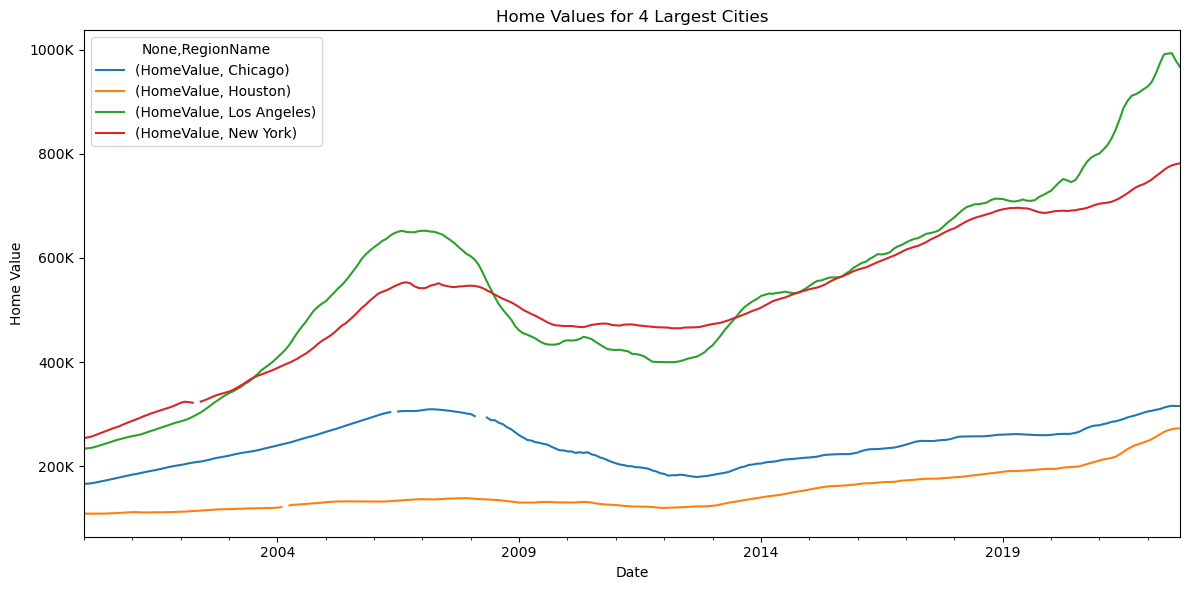

In [11]:
# Plot the home values for all 4 cities
ax = df_unstacked.plot(figsize=(12, 6))

# Add title and axis labels
plt.title('Home Values for 4 Largest Cities')
plt.xlabel('Date')
plt.ylabel('Home Value')

# Reformat y-axis ticks to use thousands of dollars with a "K" at the end
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()


## 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [12]:
# create max column and temp data frame for question 1
max_cols = ['HomeValue']
plot_df = df_unstacked.loc['2008', max_cols]
# pulling max values
max_value = plot_df['HomeValue'].max()
max_value

RegionName
Chicago        300207.0
Houston        138208.0
Los Angeles    603029.0
New York       546538.0
dtype: float64

In [13]:
# pulling min values
min_value = plot_df['HomeValue'].min()
min_value

RegionName
Chicago        265306.0
Houston        131283.0
Los Angeles    469294.0
New York       510309.0
dtype: float64

Los Angeles had the highest typical home value in 2008 with a mean of $603029.00. 

Houston had the lowest typical home value in 2008 with a mean of $131283.00 

## 2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [14]:
# 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
ts = df_unstacked['HomeValue'].loc['2008-11':'2008-12'].copy()
ts

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,271059.0,132247.0,481905.0,514767.0
2008-12-31,265306.0,131283.0,469294.0,510309.0


In [17]:
ts_diff = ts.diff()
ts_diff

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-30,NaN,NaN,NaN,NaN
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0


Changes in home values from Nov 2008 to Dec 2008
Chicago - $5,753.00

Houston - $964.00

L.A. - $12,611.00

N.Y. - $4,458.00
